In [2]:
from gymnasium import Env
from gymnasium.spaces import Box, Discrete
import numpy as np

In [4]:
observation_space = Box(low=np.array([0]), high=np.array([10]), shape = (1,), dtype=np.int16)
observation_space

Box(0, 10, (1,), int16)

In [5]:
observation_space.shape

(1,)

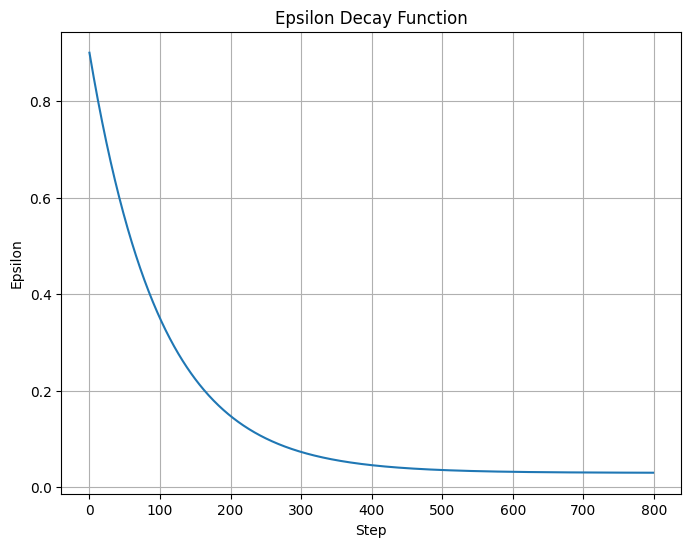

In [18]:
import matplotlib.pyplot as plt
import math

# Define the function
def epsilon_decay(x):
    EPS_START = 0.9
    EPS_END = 0.03
    EPS_DECAY = 100
    return EPS_END + (EPS_START - EPS_END) * np.exp(-1. * x / EPS_DECAY)

# Generate x values
x = range(0, 800)  # You can adjust the range as needed

# Calculate y values using the function
y = [epsilon_decay(xi) for xi in x]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.xlabel('Step')
plt.ylabel('Epsilon')
plt.title('Epsilon Decay Function')
plt.grid(True)

# Show the plot
plt.show()

In [13]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


x = torch.tensor([[2.0,5.0,2.0],[4.0,5.0,4.0]])
y = torch.tensor([[1],[1]])
print(x[y])

x = torch.tensor([[2.0,5.0,2.0]])
y = torch.tensor([1])
print(x[y])

tensor([[[4., 5., 4.]],

        [[4., 5., 4.]]])


IndexError: index 1 is out of bounds for dimension 0 with size 1

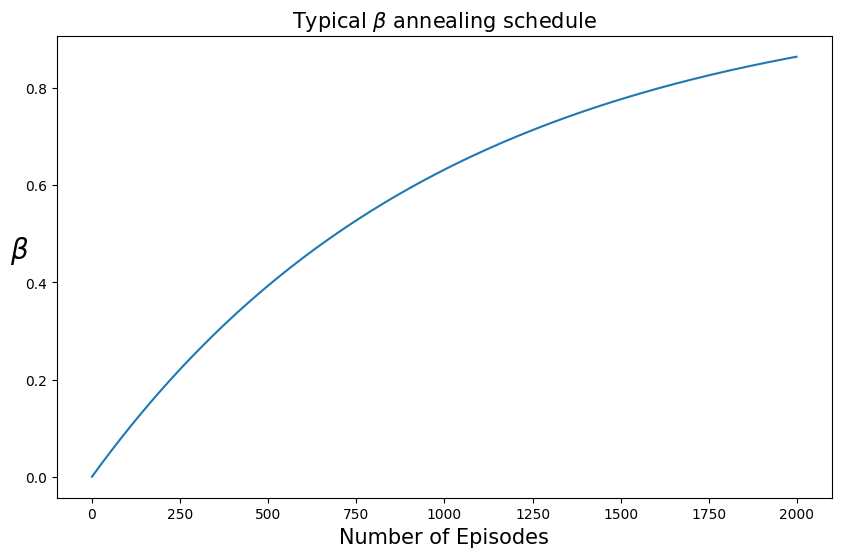

In [3]:
import matplotlib.pyplot as plt
import numpy as np
def exponential_annealing_schedule(n, rate):
    return 1 - np.exp(-rate * n)

fig, ax = plt.subplots(1, 1, figsize=(10,6))
ns = np.arange(2000)
rate = 1e-3
_ = ax.plot(ns, exponential_annealing_schedule(ns, rate))
_ = ax.set_ylabel(r"$\beta$", rotation="horizontal", fontsize=20)
_ = ax.set_xlabel("Number of Episodes", fontsize=15)
_ = ax.set_title(r"Typical $\beta$ annealing schedule", fontsize=15)

In [40]:
from numpy import random
class Test():
    def __init__(self, seed = 42):
        random.seed(seed)
        pass

    def calculate_random_integer(self):
        return random.randint(0,10)

test = Test()
print(test.calculate_random_integer())
print(test.calculate_random_integer())

6
3


In [68]:
import numpy as np
from numpy import random

a = np.array([378.31,3.11,92.2])
b = np.array([(0.027160561080834984,0.1938059167167128),(0.015649339243994923,0.05599971858005176),(0.003897539654922594,0.010297427507850577)])
random.seed(7)

def calculate_next_price(last_value, t):
    avg_gbm, std_gbm = t
    return last_value * np.exp((avg_gbm - (std_gbm ** 2) / 2) + std_gbm * random.normal())

# Apply calculate_next_price to each element of a with the respective tuple in b
for i in range(6):
    a = calculate_next_price(a, b.T)
    print(a)

[529.39139928   3.46728908  94.18045892]
[487.75187256   3.42589256  94.09070675]
[494.99504627   3.4808667   94.48506379]
[540.18248421   3.61171766  95.24787056]
[467.49528346   3.50463141  94.84114185]
[471.61820685   3.55474162  95.20848748]


In [76]:
a = np.array([378.31,3.11,92.2])
b = np.array([10,0.5,3])
random.seed(7)
for i in range(6):
    print(random.normal(a,b))

[395.21525704   2.87703131  92.29846049]
[382.38516283   2.71553849  92.20619672]
[378.30109614   2.23263785  95.25297402]
[384.31498516   2.79728551  91.68535522]
[383.36299374   2.97932179  91.47175276]
[363.77758588   3.38729016  92.57164272]


In [5]:
import numpy as np
action = 2
AP = 2
last_crops = np.array([None,None,3,3,3])

print(np.where(last_crops[-AP:]==action))
    

(array([], dtype=int64),)


In [69]:
def get_penalty(last_crops_orig,action,AP):
    penalty = 1.0
    last_crops = np.append(last_crops_orig,[action])
    i = 0
    while len(last_crops)-i-1 >= 0:
        window_start = max(0,len(last_crops)-AP-i-1)
        window_end = len(last_crops)-i-1
        test = (last_crops[window_end],window_end)
        if last_crops[window_end] != action:
            i+=1
            continue
        break_indices = np.where(last_crops[window_start:window_end]==action)[0]
        if len(break_indices) != 0:
            last_break_index = break_indices[-1]
            penalty *= 1-0.1*AP*(last_break_index+1)/AP
            i+=1
        else:
            i+=1
            break
    return penalty

import numpy as np
action = 1
AP = 3
last_crops_list = np.array([[None,None,None,None,None],[1,1,1,1,1],[None,3,3,1,1],[None,None,1,3,1],[None,1,3,1,1],[None,None,3,1,3],[3,1,1,3,3],[1,1,1,3,1]]) #
for last_crops_orig in last_crops_list:
    penalty = get_penalty(last_crops_orig,action, AP)
    print(last_crops_orig, np.round(penalty,3))
# last_crops = last_crops_list[0]



    

[None None None None None] 1.0
[1 1 1 1 1] 0.247
[None 3 3 1 1] 0.49
[None None 1 3 1] 0.56
[None 1 3 1 1] 0.392
[None None 3 1 3] 0.8
[3 1 1 3 3] 0.72
[1 1 1 3 1] 0.403


In [67]:
ts = [(2,1,2),(2,1,3),(3,1,3),(2,1,4),(3,1,4),(4,1,4),(3,2,4),(4,2,4),(4,3,4)]
for t in ts:
    count, mf_group_max_count, mf_group_window_length = t
    penalty = 1-(count/mf_group_window_length - mf_group_max_count/mf_group_window_length)
    print(t, penalty)

(2, 1, 2) 0.5
(2, 1, 3) 0.6666666666666667
(3, 1, 3) 0.33333333333333326
(2, 1, 4) 0.75
(3, 1, 4) 0.5
(4, 1, 4) 0.25
(3, 2, 4) 0.75
(4, 2, 4) 0.5
(4, 3, 4) 0.75


In [75]:
def get_multi_AP_penalty(last_crops_orig,action,AP, relevant_crops):
    penalty = 1.0
    last_crops = np.append(last_crops_orig,[action])
    i = 0
    while len(last_crops)-i-1 >= 0:
        window_start = max(0,len(last_crops)-AP-i-1)
        window_end = len(last_crops)-i-1
        if last_crops[window_end] not in relevant_crops:
            i+=1
            continue
        break_indices = np.where(np.isin(last_crops[window_start:window_end],relevant_crops))[0]
        if len(break_indices) != 0:
            last_break_index = break_indices[-1]
            penalty *= 1-0.1*AP*(last_break_index+1)/AP
            i+=1
        else:
            i+=1
            break
    return penalty

import numpy as np
action = 1
relevant_crops = [1,2,4]
AP = 3
last_crops_list = np.array([[None,None,None,None,None],[1,1,1,1,1],[1,2,2,1,1],[None,3,3,2,1],[None,3,3,4,1],[None,None,2,3,1],[None,4,3,2,1],[None,None,3,4,3],[3,2,1,3,3],[4,4,2,3,1]]) #
for last_crops_orig in last_crops_list:
    penalty = get_multi_AP_penalty(last_crops_orig,action, AP, relevant_crops)
    print(last_crops_orig, np.round(penalty,3))

[None None None None None] 1.0
[1 1 1 1 1] 0.247
[1 2 2 1 1] 0.247
[None 3 3 2 1] 0.49
[None 3 3 4 1] 0.49
[None None 2 3 1] 0.56
[None 4 3 2 1] 0.392
[None None 3 4 3] 0.8
[3 2 1 3 3] 0.72
[4 4 2 3 1] 0.403


In [13]:
import numpy as np
week = 10.
latest_sowing = 5.
print(max(0.0,1.+((latest_sowing - 1. - week)*0.2)))

-0.20000000000000018
0.0


In [12]:
import numpy as np
a = np.zeros((2,3))
b = 2

a = a[1:,:]
print(a)
print(a.shape)
bm = np.zeros((1,a.shape[1]))
bm[0,b] = 1
print(np.concatenate((a,bm),axis=0))

[[0. 0. 0.]]
(1, 3)
[[0. 0. 0.]
 [0. 0. 1.]]


In [21]:
import numpy as np

a = np.array([[1, 2, 3, 4, 5]])
b = np.array([0, 1, 2]).reshape((1,3))
print(b)
mask = np.ones_like(a, dtype=bool)
print(mask)
mask[0][b] = False
a[~mask] = 0

print(a)

[[0 1 2]]
[[ True  True  True  True  True]]
[[0 0 0 4 5]]


c:\Users\Magnus\Documents\GitHub\cro_symbolic_mbpo


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'KLEEGRAS'),
  Text(1, 0, 'LUZERNE'),
  Text(2, 0, 'ACKERBOHNE'),
  Text(3, 0, 'KOERNERERBSE'),
  Text(4, 0, 'SOJABOHNE'),
  Text(5, 0, 'FUTTERLUPINE'),
  Text(6, 0, 'WINTERWEIZEN'),
  Text(7, 0, 'SOMMERWEIZEN'),
  Text(8, 0, 'WINTERHARTWEIZEN'),
  Text(9, 0, 'WINTERDINKEL'),
  Text(10, 0, 'WINTERTRITICALE'),
  Text(11, 0, 'WINTERROGGEN'),
  Text(12, 0, 'WINTERGERSTE'),
  Text(13, 0, 'SOMMERGERSTE'),
  Text(14, 0, 'SOMMERHAFER'),
  Text(15, 0, 'HIRSE'),
  Text(16, 0, 'SILOMAIS'),
  Text(17, 0, 'KOERNERMAIS'),
  Text(18, 0, 'ZUCKERRUEBEN'),
  Text(19, 0, 'KARTOFFELN'),
  Text(20, 0, 'WINTERRAPS'),
  Text(21, 0, 'SONNENBLUMEN'),
  Text(22, 0, 'OELKUERBIS')])

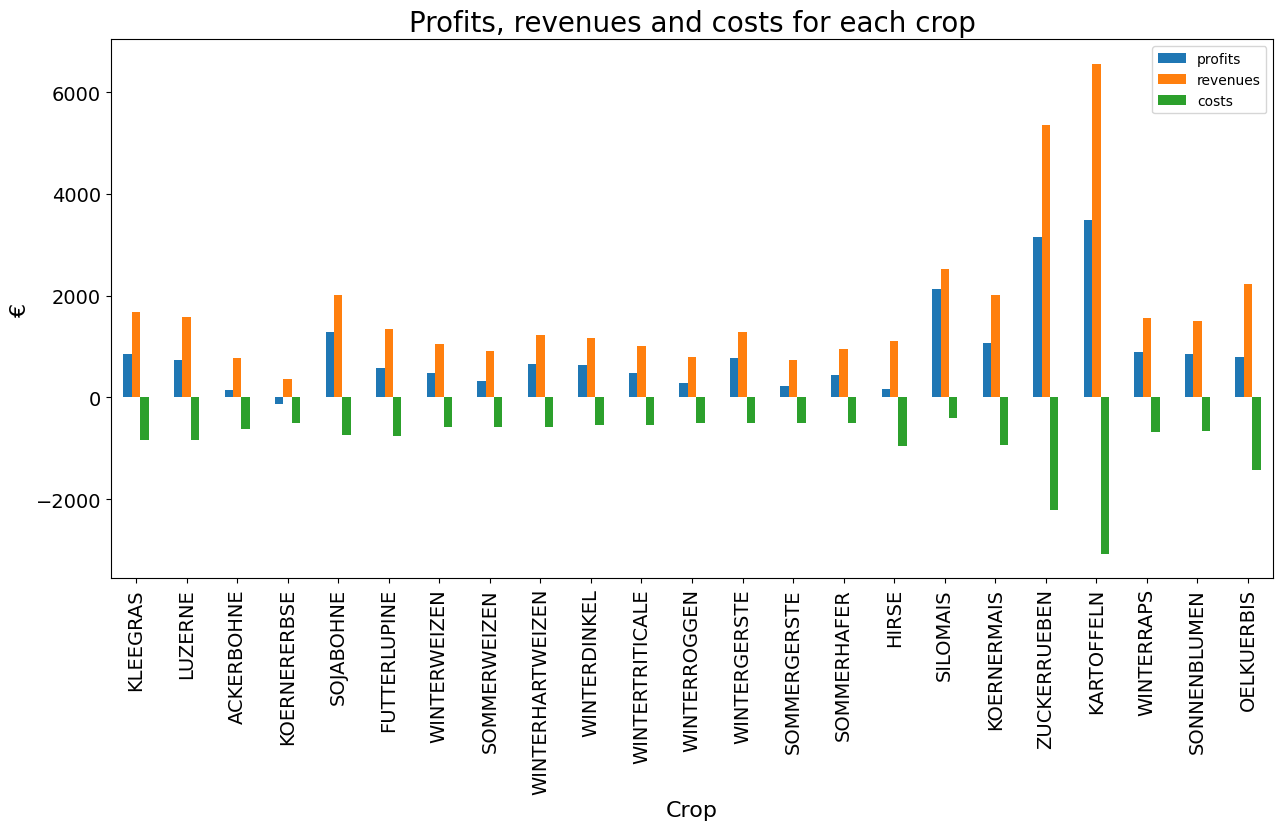

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import json
from numpy import random
from simulation_env.environment_maincrops.data.mappings import crop_mapping_german, crop_mapping_german_rev, crop_mapping_eng, date_mapping, date_mapping_rev
region = "Bundesgebiet"
print(os.getcwd())
json_file_path = "./simulation_env/environment_maincrops/data/maincrops_updated.json"
# Open and read the JSON file
with open(json_file_path, "r") as json_file:
    # Parse the JSON data into a Python dictionary
    maincrop_yields = json.load(json_file)
seed = 42
N=50
P=0
K=0
yields = np.array([random.normal(maincrop_yields[crop_name]["Ertrag"][region]["avg"], maincrop_yields[crop_name]["Ertrag"][region]["std"]) for crop_name in maincrop_yields.keys()])
prices_avg = np.array([crop["Verkaufspreis"]["avg"] for crop in maincrop_yields.values()])
prices_std = np.array([crop["Verkaufspreis"]["std"] for crop in maincrop_yields.values()])
prices = random.normal(prices_avg,prices_std)
sowing_costs_avg = np.array([crop["Kosten"]["Saatgut"]["avg"] for crop in maincrop_yields.values()])

other_costs_avg = np.array([crop["Kosten"]["Sonstiges"]["avg"] for crop in maincrop_yields.values()])

N_costs_avg = maincrop_yields["WINTERWEIZEN"]["Kosten"]["Duenger N"]["avg"]

P_costs_avg = maincrop_yields["WINTERWEIZEN"]["Kosten"]["Duenger P"]["avg"]

K_costs_avg = maincrop_yields["WINTERWEIZEN"]["Kosten"]["Duenger K"]["avg"]

average_N_fertilization_needs = np.array([max(maincrop_yields[crop_name]["Duengebedarf N"]["Value"] - N,0.0) for crop_name in maincrop_yields.keys()])
max_N_fertilization_needs = np.ones_like(average_N_fertilization_needs)*170.0
average_N_fertilization_needs = np.minimum(average_N_fertilization_needs,max_N_fertilization_needs)
average_P_fertilization_needs = np.array([max(maincrop_yields[crop_name]["Duengebedarf P"]["Value"] - P,0.0) for crop_name in maincrop_yields.keys()])
average_K_fertilization_needs = np.array([max(maincrop_yields[crop_name]["Duengebedarf K"]["Value"] - K,0.0) for crop_name in maincrop_yields.keys()])


average_N_fertilization_costs = N_costs_avg * average_N_fertilization_needs
average_P_fertilization_costs = P_costs_avg * average_P_fertilization_needs
average_K_fertilization_costs = K_costs_avg * average_K_fertilization_needs

# Calculate profits
average_revenues = yields * prices_avg
average_profits = yields * prices_avg - sowing_costs_avg - other_costs_avg - average_N_fertilization_costs - average_P_fertilization_costs - average_K_fertilization_costs
average_costs = -(sowing_costs_avg + other_costs_avg + average_N_fertilization_costs + average_P_fertilization_costs + average_K_fertilization_costs)

# Create a dataframe with the profits, revenues and costs for each crop
df = pd.DataFrame({"crop": list(maincrop_yields.keys()), "revenues": average_revenues, "costs": average_costs, "profits": average_profits})

# Plot profits next to revenues and costs for each crop in a barchart from the dataframe
df.plot.bar(x="crop", y=["profits", "revenues", "costs"], figsize=(15, 7), fontsize=14, rot=0)
plt.title("Profits, revenues and costs for each crop", fontsize=20)
plt.xlabel("Crop", fontsize=16)
plt.ylabel("€", fontsize=16)
# Make the x-labels more readable by making them vertical
plt.xticks(rotation=90)

